In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

In [37]:

class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size=12, hidden_size=128, num_layers=2, batch_first=True)
        self.fc1 = nn.Linear(128, 64)
        self.fc2 = nn.Linear(64, 14)

    def forward(self, x):
        x, _ = self.rnn(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [38]:
# Load data
X = np.load('/kaggle/input/mydata/X_train_padding.npy')
Y = np.load('/kaggle/input/mydata/y_train_padding.npy')

# Convert numpy arrays to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32)

# Create a TensorDataset and DataLoader
dataset = TensorDataset(X_tensor, Y_tensor)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

In [39]:
# Initialize the model, loss function, and optimizer
model = RNN()
if torch.cuda.is_available():
    model = model.to('cuda')
criterion = nn.MSELoss()  # Assuming a regression problem
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [40]:
num_epochs = 10
all_losses = []

Epoch [1/10], Avg. Loss: 1659.8817
Epoch [2/10], Avg. Loss: 1299.4048
Epoch [3/10], Avg. Loss: 858.1326
Epoch [4/10], Avg. Loss: 705.8716
Epoch [5/10], Avg. Loss: 686.8592
Epoch [6/10], Avg. Loss: 688.4862
Epoch [7/10], Avg. Loss: 683.6825
Epoch [8/10], Avg. Loss: 684.3948
Epoch [9/10], Avg. Loss: 683.3684
Epoch [10/10], Avg. Loss: 682.9480


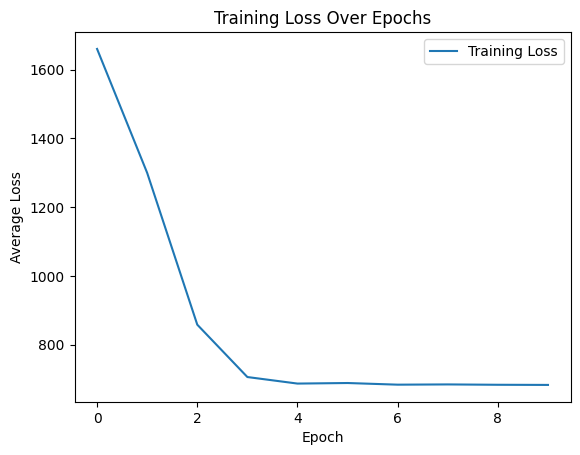

In [41]:
for epoch in range(num_epochs):
    epoch_loss = 0.0

    for batch_data, batch_target in dataloader:
        if torch.cuda.is_available():
            batch_data, batch_target = batch_data.to('cuda'), batch_target.to('cuda')
        optimizer.zero_grad()
        outputs = model(batch_data)
        loss = criterion(outputs, batch_target)  # Ensure target shape matches output shape
        loss.backward()
        optimizer.step()

        # Accumulate the loss for the current batch
        epoch_loss += loss.item()

    # Calculate average loss for the epoch
    avg_epoch_loss = epoch_loss / len(dataloader)

    # Print the average loss for the epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Avg. Loss: {avg_epoch_loss:.4f}')

    # Save the average loss for plotting
    all_losses.append(avg_epoch_loss)

# Plot the training loss
plt.plot(all_losses, label='Training Loss')
plt.savefig('CNN_LSTM_training_loss.png')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.legend()
plt.show()